In [7]:
# Sample data: Number of games between each no-hitter in Major League Baseball (1901-2015)

nohitter_times = [843, 1613, 1101, 215, 684, 814, 1243, 138, 479, 141, 337, 

                           633, 124, 219, 544, 93, 115, 810, 202, 338, 966, 1148, 941, 

                           830, 2245, 717, 512, 102, 87, 1322, 790, 156, 1014, 112, 

                           526, 186, 361, 1095, 165, 122, 529, 273, 104, 1468, 918, 

                           874, 202, 262, 95, 528, 117, 570, 77, 631, 581, 142, 512, 

                           447, 527, 82, 216, 444, 469, 334, 298, 729, 1117, 179, 

                           1588, 100, 159, 221, 1384, 394, 1431, 295, 102, 308, 519, 

                           128, 79, 328, 130, 120, 94, 115, 285, 92, 89, 70, 108, 

                           365, 485, 126, 1657, 881, 85, 146, 82, 1162, 292, 357, 

                           115, 419, 364, 622, 524, 83, 357, 1192, 671, 381, 424, 

                           133, 90, 171, 166, 451, 714, 91, 219, 142, 448, 536, 

                           113, 191, 234, 402, 381, 521, 77, 257, 176, 258, 159]


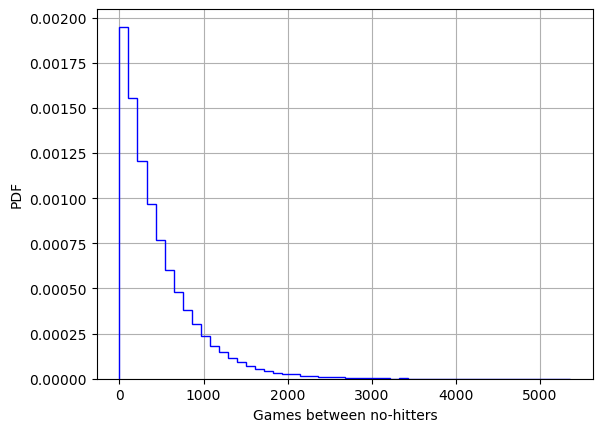

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(np.array(nohitter_times))

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, size=100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step', color='blue')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.grid(True)
plt.show()

In [9]:
import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

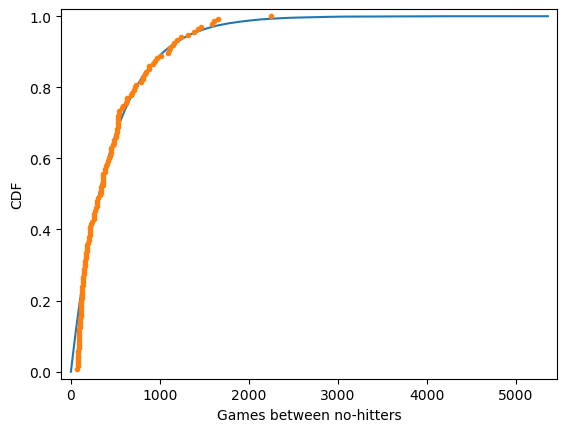

In [12]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

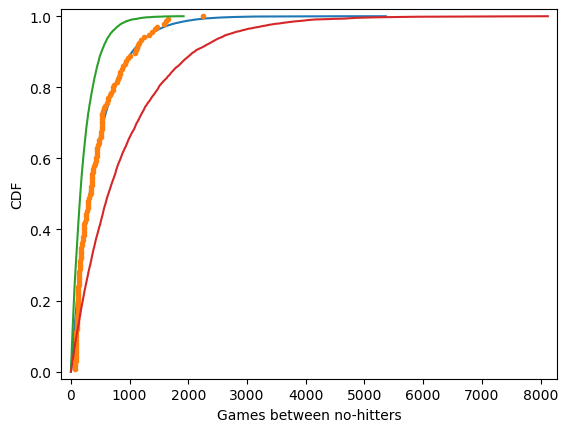

In [16]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau / 2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2 * tau, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()